<a href="https://colab.research.google.com/github/JORDANGAMBA99/Data-Science-Projects/blob/main/Spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.**

**HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.**

**CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.**

**Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.**

**Destination - The planet the passenger will be debarking to.**

**Age - The age of the passenger.**

**VIP - Whether the passenger has paid for special VIP service during the voyage.**

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.**

**Name - The first and last names of the passenger.**

**Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.**

**Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.**

**The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.**

**While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!**

**To help rescue crews and retrieve the lost passengers**,

## You are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

**Loading the dataset**

In [93]:
df = pd.read_csv('/content/Spaceship_titanic_train_data.csv')
cf = pd.read_csv('/content/Spaceship_titanic_test_data.csv')

In [94]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [95]:
kf = cf.copy()

In [96]:
cf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [98]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [99]:
cf.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [100]:
cf.shape

(4277, 13)

In [101]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [102]:
# numerical values
# Age RoomService	FoodCourt	ShoppingMall	Spa	VRDeck
# String Values
# HomePlanet	CryoSleep	Cabin	Destination

**For string values we fill the missing values with placeholders**

In [103]:
df['HomePlanet'].fillna('Missing', inplace=True)
df['CryoSleep'].fillna('Missing', inplace=True)
df['Cabin'].fillna('Missing', inplace=True)
df['Destination'].fillna('Missing', inplace=True)
df['VIP'].fillna('Missing', inplace=True)
df['Name'].fillna('Missing', inplace=True)

In [104]:
cf['HomePlanet'].fillna('Missing', inplace=True)
cf['CryoSleep'].fillna('Missing', inplace=True)
cf['Cabin'].fillna('Missing', inplace=True)
cf['Destination'].fillna('Missing', inplace=True)
cf['VIP'].fillna('Missing', inplace=True)
cf['Name'].fillna('Missing', inplace=True)

In [105]:
df.drop('Cabin',axis=1,inplace=True)
cf.drop('Cabin',axis=1,inplace=True)
cf.drop('Name',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
cf.drop('PassengerId',axis=1,inplace=True)

**For numerical values we fill the missing values with the mean**

<Axes: xlabel='Age', ylabel='Count'>

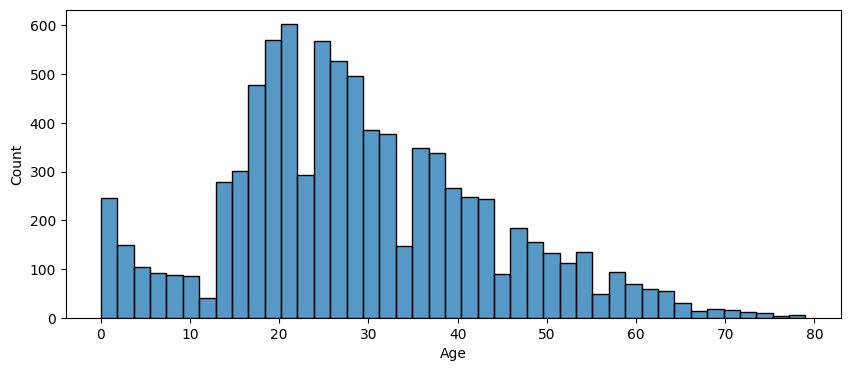

In [106]:
plt.figure(figsize=(10,4))
sns.histplot(df,x='Age',palette='viridis')

In [107]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(),inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(),inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(),inplace=True)
df['Spa'].fillna(df['Spa'].mean(),inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(),inplace=True)

**Filled numerical missing values with mean**

In [108]:
cf['Age'].fillna(cf['Age'].mean(),inplace=True)
cf['RoomService'].fillna(cf['RoomService'].mean(),inplace=True)
cf['FoodCourt'].fillna(cf['FoodCourt'].mean(),inplace=True)
cf['ShoppingMall'].fillna(cf['ShoppingMall'].mean(),inplace=True)
cf['Spa'].fillna(cf['Spa'].mean(),inplace=True)
cf['VRDeck'].fillna(cf['VRDeck'].mean(),inplace=True)

In [109]:
# Age RoomService	FoodCourt	ShoppingMall	Spa	VRDeck

<Figure size 1000x400 with 0 Axes>

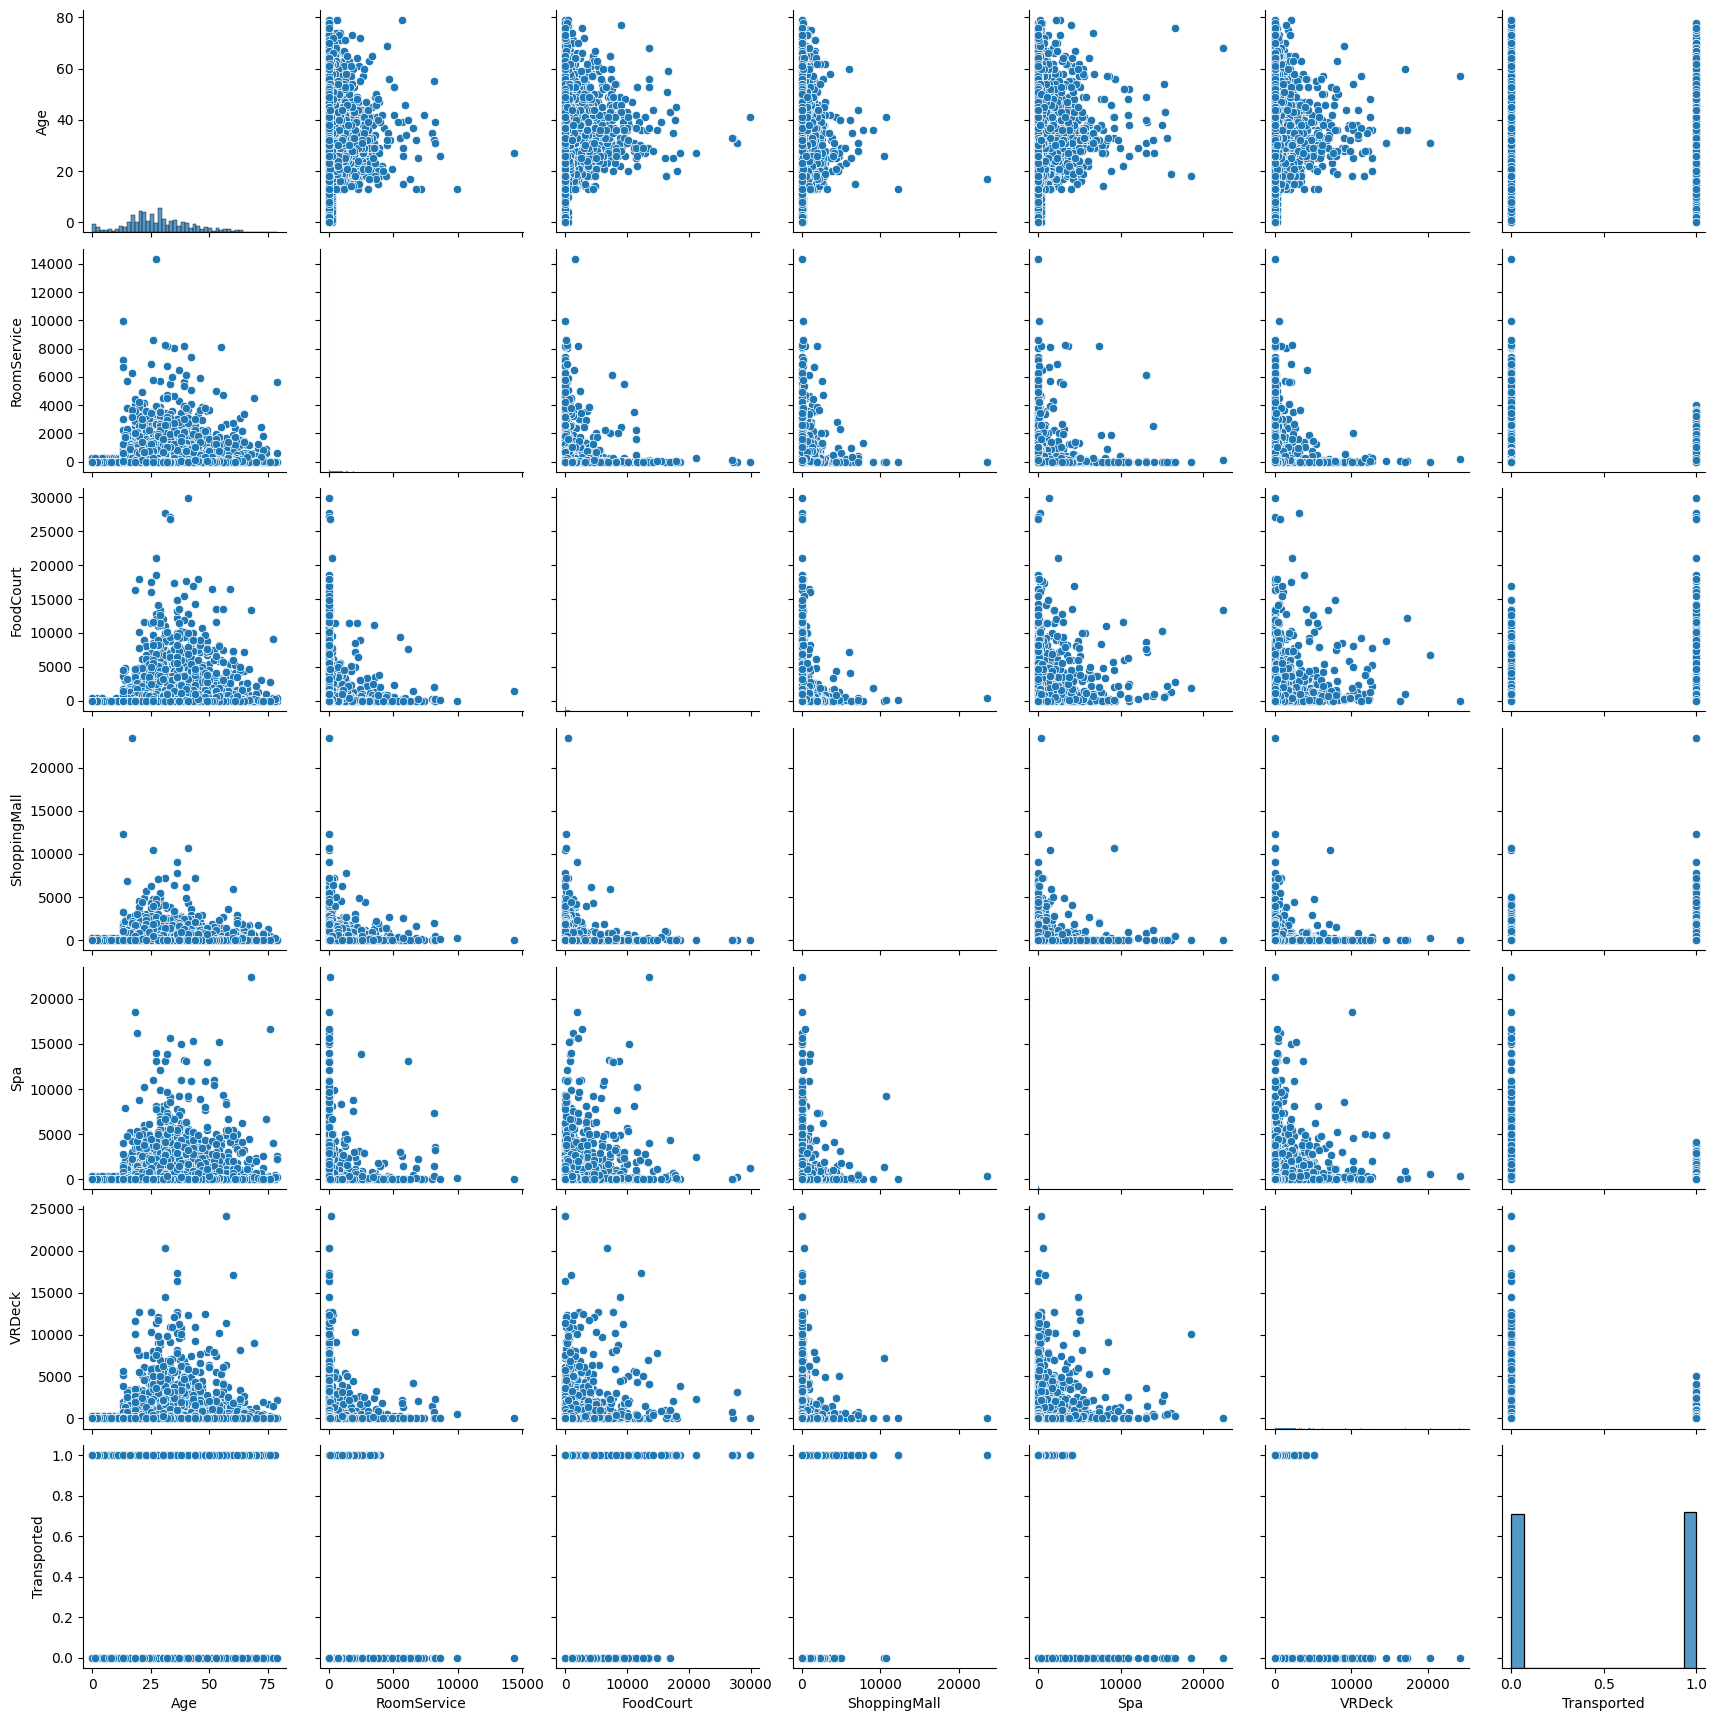

In [110]:
plt.figure(figsize=(10,4))
sns.pairplot(df)

**We don't really have any observable relationship in the dataset**

In [111]:
# numerical values
# Age RoomService	FoodCourt	ShoppingMall	Spa	VRDeck
# String Values
# HomePlanet	CryoSleep	Cabin	Destination

**Separate Numerical and Categorical Columns**

In [112]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_train = df.select_dtypes(include=['object', 'category']).columns
categorical_cols_test = df.select_dtypes(include=['object', 'category']).columns

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


**Encode the Training and Test data**

In [114]:
# One-hot encode training
df_filled_train= df.copy()
df_encoded = pd.get_dummies(df_filled_train,columns=categorical_cols_train,dtype=int)

In [115]:
# One-hot encode test data
cf_filled_test = cf.copy()
cf_encoded_test = pd.get_dummies(cf_filled_test, columns=categorical_cols_test,dtype=int)

**Initial model training using Decision Tree Classifier**

**Train a baseline model (no tuning, all features)**

In [116]:
X_base = df_encoded.drop(['Transported'],axis=1)
y_base = df_encoded['Transported']

**Train the baseline Decision Tree**

In [117]:
from sklearn.tree import DecisionTreeClassifier

# Initialize with default parameters (baseline model)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_base, y_base)

DecisionTreeClassifier(random_state=42)

In [118]:
# Predict target for test data
test_predictions = dt_model.predict(cf_encoded_test)
print(test_predictions)

[ True False  True ...  True  True False]


In [119]:
print(test_predictions[:10])

[ True False  True  True  True  True  True  True  True  True]


**Feature Selection using Random Forest on training data**

In [120]:
X = df_encoded.drop('Transported',axis=1)
y = df_encoded['Transported']

In [121]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=30,n_jobs=-1)
model.fit(X,y)
feature_imp = model.feature_importances_
print(feature_imp)

[0.10564436 0.10643536 0.09980415 0.07575978 0.12094361 0.11782682
 0.04576905 0.02715127 0.01230831 0.00327354 0.13477573 0.11559197
 0.00450574 0.00821537 0.00259848 0.00499368 0.00645044 0.00311679
 0.00165203 0.0031835 ]


**Sort and get top 10 features**

In [122]:
# Sort and get top features
feature_importance = pd.Series(feature_imp, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
print(top_features)

CryoSleep_False      0.134776
Spa                  0.120944
VRDeck               0.117827
CryoSleep_True       0.115592
RoomService          0.106435
Age                  0.105644
FoodCourt            0.099804
ShoppingMall         0.075760
HomePlanet_Earth     0.045769
HomePlanet_Europa    0.027151
dtype: float64


In [123]:
top_features = pd.DataFrame(top_features)

In [124]:
print(top_features)

                          0
CryoSleep_False    0.134776
Spa                0.120944
VRDeck             0.117827
CryoSleep_True     0.115592
RoomService        0.106435
Age                0.105644
FoodCourt          0.099804
ShoppingMall       0.075760
HomePlanet_Earth   0.045769
HomePlanet_Europa  0.027151


In [125]:
df_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,CryoSleep_False,CryoSleep_True,CryoSleep_Missing,Destination_55 Cancri e,Destination_Missing,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,VIP_Missing
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,...,1,0,0,0,0,0,1,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,...,1,0,0,0,0,0,1,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,...,1,0,0,0,0,0,1,1,0,0


**Create a list of the important features**

In [126]:
top_features = ['CryoSleep_True', 'CryoSleep_False', 'RoomService', 'Spa',
                      'VRDeck', 'FoodCourt', 'ShoppingMall', 'Age',
                      'HomePlanet_Europa', 'HomePlanet_Earth']

In [127]:
X_train_filtered = df_encoded[top_features]
y_train = df_encoded['Transported']

In [128]:
X_test_filtered = cf_encoded_test[top_features]

In [129]:
from sklearn.tree import DecisionTreeClassifier

dt_model_filtered = DecisionTreeClassifier(random_state=42)
dt_model_filtered.fit(X_train_filtered, y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
# Predict target for test data
test_predictions_1 = dt_model_filtered.predict(X_test_filtered)
print(test_predictions_1)

[ True False  True ...  True  True False]


In [131]:
print(test_predictions_1[:10])

[ True False  True  True False  True  True  True  True  True]


In [137]:
kf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [143]:
submission = pd.DataFrame({'PassengerId':kf['PassengerId'],'Transported':test_predictions_1})

In [144]:
submission.to_csv('submission.csv',index=False)